In [10]:
import pandas as pd

# Load the data
data_path = '/Users/aimaldastagirzada/Downloads/supply_chain_data.csv'
data = pd.read_csv(data_path)

# Display the first few rows of the dataframe
data.head()


,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

In [12]:
data['Location'].value_counts()

Location
Kolkata      25
Mumbai       22
Chennai      20
Bangalore    18
Delhi        15
Name: count, dtype: int64

In [13]:
import numpy as np

# Define a list of random cities from around the world
cities = [
    "New York", "London", "Tokyo", "Paris", "Sydney", "Cape Town", "Moscow", "Rio de Janeiro",
    "Toronto", "Beijing", "Mumbai", "Istanbul", "Dubai", "Singapore", "Hong Kong", 
    "Mexico City", "Lagos", "Johannesburg", "Bangkok", "Cairo"
]

# Function to generate random data for a column based on its original data
def generate_random_data(col, num_rows):
    if col.dtype == 'object':
        # For object types, randomly select from unique values if not generating city names
        return np.random.choice(col.unique(), size=num_rows)
    elif col.dtype == 'int64':
        # For integer types, generate random integers within the original range
        return np.random.randint(col.min(), col.max() + 1, size=num_rows)
    elif col.dtype == 'float64':
        # For float types, generate random floats within the original range
        return np.random.uniform(col.min(), col.max(), size=num_rows)
    else:
        # Return None for any type not explicitly handled
        return [None] * num_rows

# Generate synthetic data for each column except for the new 'Delivery Location' column
num_rows = 100000
synthetic_data = pd.DataFrame({col: generate_random_data(data[col], num_rows) for col in data.columns})

# Add the 'Delivery Location' column with random cities
synthetic_data['Delivery Location'] = np.random.choice(cities, size=num_rows)

# Display the first few rows of the synthetic data to verify
synthetic_data


,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs,Delivery Location
0,cosmetics,SKU82,12.058493,94,663,4985.752351,Non-binary,83,15,34,...,22,479,4,44.795726,Pass,3.362031,Road,Route A,529.107394,Bangkok
1,skincare,SKU23,52.133164,18,690,4049.212165,Unknown,67,1,90,...,24,144,25,74.777333,Pass,4.321875,Sea,Route C,355.042350,Cape Town
2,cosmetics,SKU76,61.691026,66,12,7358.181153,Female,88,8,5,...,14,793,29,61.361125,Fail,3.555697,Air,Route C,771.922221,Dubai
3,haircare,SKU94,14.129116,25,63,6907.755254,Unknown,58,28,90,...,1,574,21,64.555934,Pending,3.891903,Road,Route B,811.647151,Tokyo
4,cosmetics,SKU61,35.308222,11,575,6613.742868,Male,13,4,38,...,24,526,2,24.716179,Pending,4.450105,Air,Route A,440.093880,London
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,haircare,SKU31,77.226399,93,948,2008.707757,Non-binary,55,7,68,...,4,495,23,36.832738,Fail,1.830323,Rail,Route B,719.491791,Istanbul
99996,cosmetics,SKU59,97.854030,33,592,7293.560787,Unknown,53,26,65,...,2,381,27,19.609189,Pass,2.970738,Rail,Route A,741.622948,New York
99997,skincare,SKU98,3.086733,35,395,5765.163916,Male,38,26,4,...,6,511,18,84.396663,Pass,4.522831,Sea,Route B,318.551420,Mexico City
99998,skincare,SKU29,25.280143,65,692,7012.103927,Non-binary,83,27,13,...,22,316,1,47.659325,Pass,2.756204,Rail,Route C,590.084760,Hong Kong


In [16]:
synthetic_data.to_csv("/Users/aimaldastagirzada/Downloads/supply_chain_synthetic.csv")

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Assuming 'synthetic_data' is your DataFrame
# Correctly identifying numerical and categorical columns while excluding target variables
numerical_cols = synthetic_data.select_dtypes(include=['int64', 'float64']).drop(['Lead times', 'Costs'], axis=1).columns
categorical_cols = synthetic_data.select_dtypes(include=['object']).columns

# Preprocessing for numerical data: simple imputation and standard scaling
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data: simple imputation and one hot encoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Defining features and targets
Y = synthetic_data[['Lead times', 'Costs']]
X = synthetic_data.drop(['Lead times', 'Costs'], axis=1)

# Splitting the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Setting up the ColumnTransformer with the updated column references
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Applying the preprocessing to the X data
X_train_prepared = preprocessor.fit_transform(X_train)
X_test_prepared = preprocessor.transform(X_test)

# To display the shape of the prepared datasets
X_train_prepared.shape, X_test_prepared.shape


((80000, 163), (20000, 163))

In [15]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# For simplicity, let's focus on optimizing 'Lead time' first
Y_train_lead_time = Y_train['Lead times']
Y_test_lead_time = Y_test['Lead times']

# Initializing and training the Gradient Boosting Regressor
gb_reg = GradientBoostingRegressor(random_state=42)
gb_reg.fit(X_train_prepared, Y_train_lead_time)

# Predicting on the test set
Y_pred_lead_time = gb_reg.predict(X_test_prepared)

# Evaluating the model performance
mse = mean_squared_error(Y_test_lead_time, Y_pred_lead_time)
rmse = mse ** 0.5

rmse


8.695883749413639

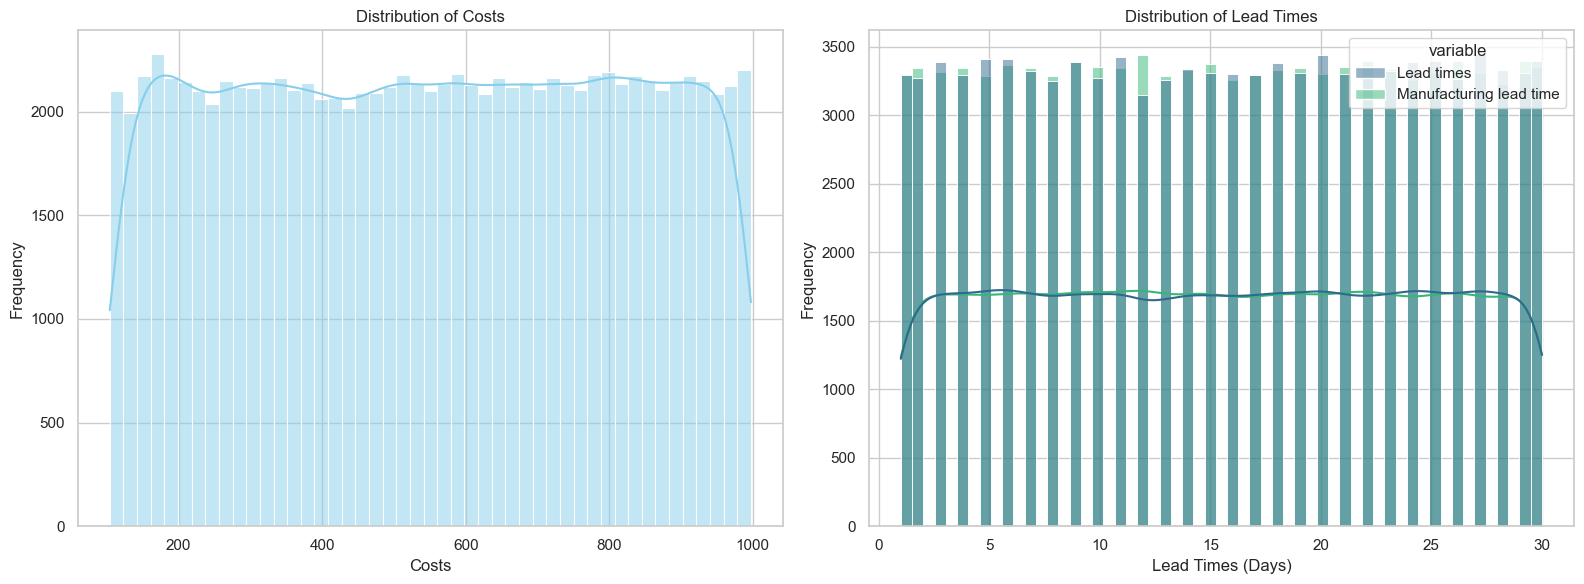

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a figure with subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Costs Visualization
sns.histplot(synthetic_data['Costs'], kde=True, ax=axs[0], color='skyblue')
axs[0].set_title('Distribution of Costs')
axs[0].set_xlabel('Costs')
axs[0].set_ylabel('Frequency')

# Lead Times Visualization (combining Lead times and Manufacturing lead time for a broader view)
sns.histplot(synthetic_data[['Lead times', 'Manufacturing lead time']].melt(value_name="Lead Time"), 
             x="Lead Time", hue="variable", kde=True, ax=axs[1], palette="viridis")
axs[1].set_title('Distribution of Lead Times')
axs[1].set_xlabel('Lead Times (Days)')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()
